In [55]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [56]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [57]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [58]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [59]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [60]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [61]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [62]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [63]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [64]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [65]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [66]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [67]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [68]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [69]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [70]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [71]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [72]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [73]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [74]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [75]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [76]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [77]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [78]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0
...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2


In [79]:
!pip install  torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:0000:010:01


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = combined_snli_df.drop(['True_Label'], axis=1).values
y_snli = combined_snli_df['True_Label'].values

# Features and Labels
X_mnli_matched = combined_mnli_matched_df.drop(['True_Label'], axis=1).values
y_mnli_matched = combined_mnli_matched_df['True_Label'].values

# Features and Labels
X_mnli_mismatched = combined_mnli_mismatched_df.drop(['True_Label'], axis=1).values
y_mnli_mismatched = combined_mnli_mismatched_df['True_Label'].values

# Features and Labels
X_anli_r1 = combined_anli_r1_df.drop(['True_Label'], axis=1).values
y_anli_r1 = combined_anli_r1_df['True_Label'].values

# Features and Labels
X_anli_r2 = combined_anli_r2_df.drop(['True_Label'], axis=1).values
y_anli_r2 = combined_anli_r2_df['True_Label'].values

# Features and Labels
X_anli_r3 = combined_anli_r3_df.drop(['True_Label'], axis=1).values
y_anli_r3 = combined_anli_r3_df['True_Label'].values


In [81]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Function to create graph data
def create_graph(data, labels):
    num_nodes = data.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))
    return graph_data

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True

# Simple GCN Model
class SimpleGCN(torch.nn.Module):
    def __init__(self, input_dim):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(input_dim, 32)  # Input to hidden layer
        self.conv2 = GCNConv(32, 3)  # Output layer for classification

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)  # Dropout
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [82]:

import torch
from sklearn.metrics import f1_score, recall_score



# Define plot_training_and_validation function
def plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    # Training and validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.legend()
    # Training and validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()



# Training and evaluation function with input dimension fix
def train_and_evaluate(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = SimpleGCN(input_dim)  # Instantiate model with correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Learning rate and weight decay
    criterion = torch.nn.CrossEntropyLoss()  # Loss function

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_f1_scores = []
    val_f1_scores = []
    train_recalls = []
    val_recalls = []

    # Training with validation and early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss

        # Calculate training F1-score and recall
        train_pred = out.argmax(dim=1).cpu().numpy()  # Get predicted labels
        train_labels = train_data.y.cpu().numpy()
        train_f1 = f1_score(train_labels, train_pred, average='weighted')
        train_recall = recall_score(train_labels, train_pred, average='weighted')
        train_f1_scores.append(train_f1)
        train_recalls.append(train_recall)

        # Validation
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())  # Store validation loss
            val_pred = val_out.argmax(dim=1).cpu().numpy()  # Get predicted labels
            val_labels = test_data.y.cpu().numpy()
            val_f1 = f1_score(val_labels, val_pred, average='weighted')
            val_recall = recall_score(val_labels, val_pred, average='weighted')
            val_f1_scores.append(val_f1)
            val_recalls.append(val_recall)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val F1-score: {val_f1:.4f}, Val Recall: {val_recall:.4f}")

        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break

    # Final F1-score and recall on validation data
    final_val_f1 = val_f1_scores[-1]
    final_val_recall = val_recalls[-1]

    print(f"Final Validation F1-score on {name}: {final_val_f1:.4f}")
    print(f"Final Validation Recall on {name}: {final_val_recall:.4f}")

    # Plot training and validation curves
    plot_training_and_validation(train_f1_scores, val_f1_scores, train_recalls, val_recalls, name)

    return model, final_val_f1, final_val_recall


Epoch 1/100, Train Loss: 1.1606, Val Loss: 1.0995, Val F1-score: 0.4713, Val Recall: 0.5623
Epoch 2/100, Train Loss: 1.1088, Val Loss: 1.0498, Val F1-score: 0.4820, Val Recall: 0.5766
Epoch 3/100, Train Loss: 1.0636, Val Loss: 1.0026, Val F1-score: 0.4914, Val Recall: 0.5863
Epoch 4/100, Train Loss: 1.0136, Val Loss: 0.9572, Val F1-score: 0.5104, Val Recall: 0.6005
Epoch 5/100, Train Loss: 0.9671, Val Loss: 0.9134, Val F1-score: 0.5400, Val Recall: 0.6188
Epoch 6/100, Train Loss: 0.9261, Val Loss: 0.8713, Val F1-score: 0.9167, Val Recall: 0.9165
Epoch 7/100, Train Loss: 0.8827, Val Loss: 0.8305, Val F1-score: 0.9271, Val Recall: 0.9267
Epoch 8/100, Train Loss: 0.8456, Val Loss: 0.7911, Val F1-score: 0.9277, Val Recall: 0.9272
Epoch 9/100, Train Loss: 0.8058, Val Loss: 0.7535, Val F1-score: 0.9282, Val Recall: 0.9277
Epoch 10/100, Train Loss: 0.7724, Val Loss: 0.7177, Val F1-score: 0.9277, Val Recall: 0.9272
Epoch 11/100, Train Loss: 0.7379, Val Loss: 0.6837, Val F1-score: 0.9287, Val R

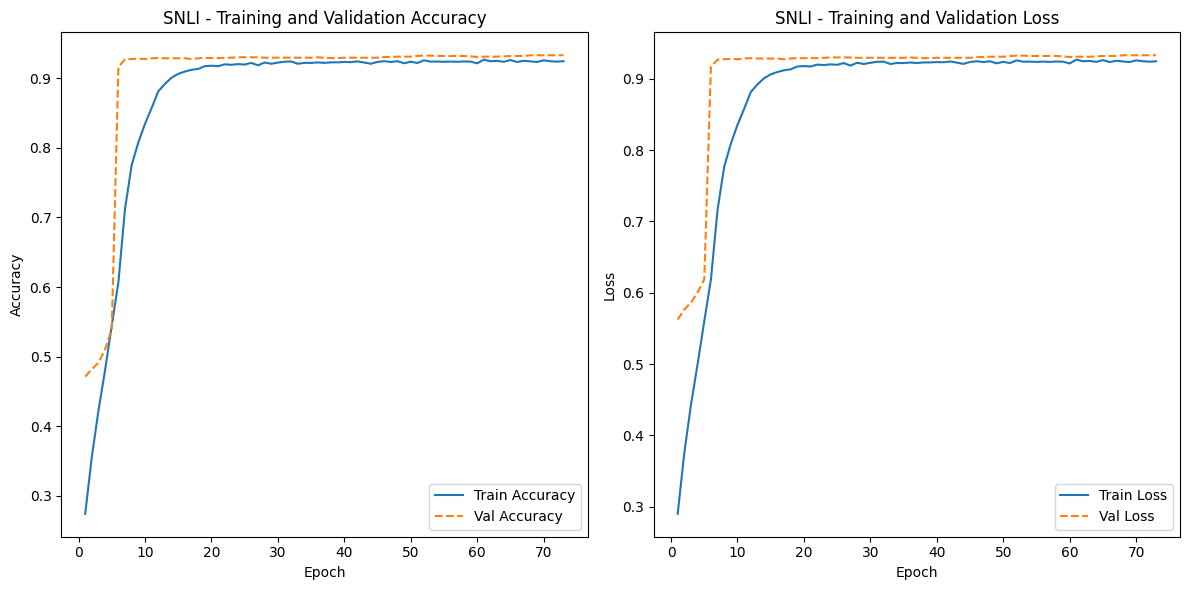

In [83]:
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Create graph data for SNLI
train_graph_snli = create_graph(X_train_snli, y_train_snli)
test_graph_snli = create_graph(X_test_snli, y_test_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate(
    train_graph_snli, test_graph_snli, 'SNLI'
)


Epoch 1/100, Train Loss: 0.9202, Val Loss: 0.8619, Val F1-score: 0.6609, Val Recall: 0.7005
Epoch 2/100, Train Loss: 0.8796, Val Loss: 0.8189, Val F1-score: 0.9122, Val Recall: 0.9124
Epoch 3/100, Train Loss: 0.8362, Val Loss: 0.7780, Val F1-score: 0.9181, Val Recall: 0.9180
Epoch 4/100, Train Loss: 0.8007, Val Loss: 0.7385, Val F1-score: 0.9217, Val Recall: 0.9215
Epoch 5/100, Train Loss: 0.7620, Val Loss: 0.7006, Val F1-score: 0.9248, Val Recall: 0.9246
Epoch 6/100, Train Loss: 0.7245, Val Loss: 0.6642, Val F1-score: 0.9248, Val Recall: 0.9246
Epoch 7/100, Train Loss: 0.6874, Val Loss: 0.6293, Val F1-score: 0.9238, Val Recall: 0.9236
Epoch 8/100, Train Loss: 0.6518, Val Loss: 0.5962, Val F1-score: 0.9229, Val Recall: 0.9226
Epoch 9/100, Train Loss: 0.6206, Val Loss: 0.5648, Val F1-score: 0.9208, Val Recall: 0.9205
Epoch 10/100, Train Loss: 0.5906, Val Loss: 0.5349, Val F1-score: 0.9208, Val Recall: 0.9205
Epoch 11/100, Train Loss: 0.5616, Val Loss: 0.5065, Val F1-score: 0.9198, Val R

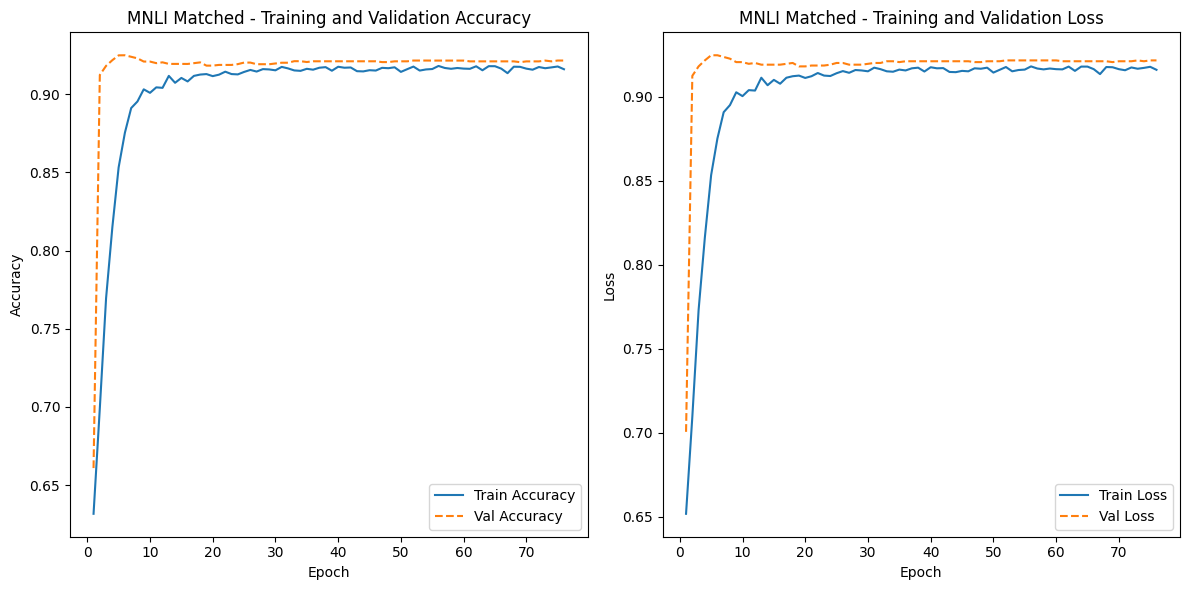

In [84]:
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Create graph data for MNLI Matched
train_graph_mnli_matched = create_graph(X_train_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_test_mnli_matched, y_test_mnli_matched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched'
)

Epoch 1/100, Train Loss: 1.2051, Val Loss: 1.1341, Val F1-score: 0.1912, Val Recall: 0.3442
Epoch 2/100, Train Loss: 1.1467, Val Loss: 1.0789, Val F1-score: 0.2155, Val Recall: 0.3620
Epoch 3/100, Train Loss: 1.0924, Val Loss: 1.0265, Val F1-score: 0.5312, Val Recall: 0.6197
Epoch 4/100, Train Loss: 1.0339, Val Loss: 0.9767, Val F1-score: 0.5578, Val Recall: 0.6497
Epoch 5/100, Train Loss: 0.9931, Val Loss: 0.9291, Val F1-score: 0.6007, Val Recall: 0.6751
Epoch 6/100, Train Loss: 0.9427, Val Loss: 0.8832, Val F1-score: 0.9020, Val Recall: 0.9029
Epoch 7/100, Train Loss: 0.8952, Val Loss: 0.8392, Val F1-score: 0.9134, Val Recall: 0.9136
Epoch 8/100, Train Loss: 0.8535, Val Loss: 0.7982, Val F1-score: 0.9187, Val Recall: 0.9187
Epoch 9/100, Train Loss: 0.8119, Val Loss: 0.7593, Val F1-score: 0.9183, Val Recall: 0.9181
Epoch 10/100, Train Loss: 0.7717, Val Loss: 0.7220, Val F1-score: 0.9168, Val Recall: 0.9166
Epoch 11/100, Train Loss: 0.7394, Val Loss: 0.6866, Val F1-score: 0.9179, Val R

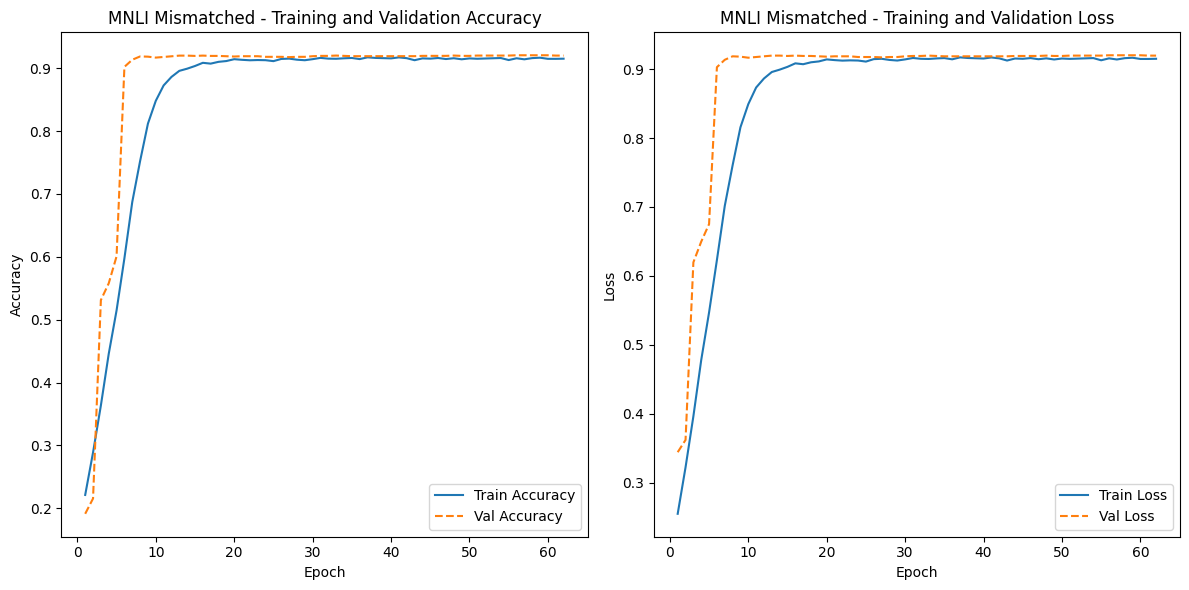

In [85]:
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Create graph data for MNLI mismatched
train_graph_mnli_mismatched = create_graph(X_train_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_test_mnli_mismatched, y_test_mnli_mismatched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched'
)

Epoch 1/100, Train Loss: 1.0708, Val Loss: 1.0591, Val F1-score: 0.3501, Val Recall: 0.4250
Epoch 2/100, Train Loss: 1.0447, Val Loss: 1.0366, Val F1-score: 0.3844, Val Recall: 0.4450
Epoch 3/100, Train Loss: 1.0164, Val Loss: 1.0149, Val F1-score: 0.6123, Val Recall: 0.6100
Epoch 4/100, Train Loss: 0.9920, Val Loss: 0.9937, Val F1-score: 0.6340, Val Recall: 0.6300
Epoch 5/100, Train Loss: 0.9681, Val Loss: 0.9731, Val F1-score: 0.6548, Val Recall: 0.6500
Epoch 6/100, Train Loss: 0.9489, Val Loss: 0.9534, Val F1-score: 0.6618, Val Recall: 0.6600
Epoch 7/100, Train Loss: 0.9198, Val Loss: 0.9344, Val F1-score: 0.6566, Val Recall: 0.6550
Epoch 8/100, Train Loss: 0.9042, Val Loss: 0.9160, Val F1-score: 0.6566, Val Recall: 0.6550
Epoch 9/100, Train Loss: 0.8761, Val Loss: 0.8983, Val F1-score: 0.6655, Val Recall: 0.6650
Epoch 10/100, Train Loss: 0.8489, Val Loss: 0.8814, Val F1-score: 0.6700, Val Recall: 0.6700
Epoch 11/100, Train Loss: 0.8399, Val Loss: 0.8657, Val F1-score: 0.6700, Val R

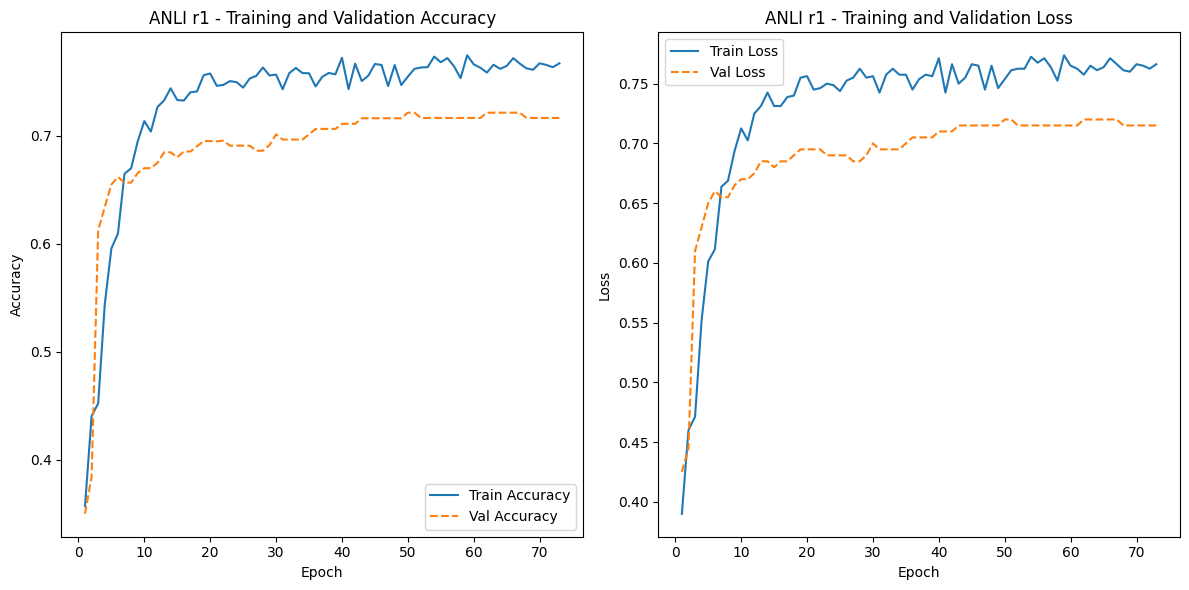

In [86]:
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Create graph data for ANLI r1
train_graph_anli_r1 = create_graph(X_train_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_test_anli_r1, y_test_anli_r1)

# Call the function to train and evaluate for ANLI r1
model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI r1'
)

Epoch 1/100, Train Loss: 1.0856, Val Loss: 1.0325, Val F1-score: 0.4598, Val Recall: 0.5000
Epoch 2/100, Train Loss: 1.0527, Val Loss: 1.0136, Val F1-score: 0.5536, Val Recall: 0.5750
Epoch 3/100, Train Loss: 1.0287, Val Loss: 0.9950, Val F1-score: 0.6645, Val Recall: 0.6650
Epoch 4/100, Train Loss: 1.0200, Val Loss: 0.9771, Val F1-score: 0.6909, Val Recall: 0.6900
Epoch 5/100, Train Loss: 1.0031, Val Loss: 0.9599, Val F1-score: 0.6902, Val Recall: 0.6900
Epoch 6/100, Train Loss: 0.9828, Val Loss: 0.9433, Val F1-score: 0.6948, Val Recall: 0.6950
Epoch 7/100, Train Loss: 0.9804, Val Loss: 0.9273, Val F1-score: 0.6948, Val Recall: 0.6950
Epoch 8/100, Train Loss: 0.9748, Val Loss: 0.9118, Val F1-score: 0.6995, Val Recall: 0.7000
Epoch 9/100, Train Loss: 0.9372, Val Loss: 0.8964, Val F1-score: 0.7097, Val Recall: 0.7100
Epoch 10/100, Train Loss: 0.9338, Val Loss: 0.8814, Val F1-score: 0.7148, Val Recall: 0.7150
Epoch 11/100, Train Loss: 0.9177, Val Loss: 0.8669, Val F1-score: 0.7148, Val R

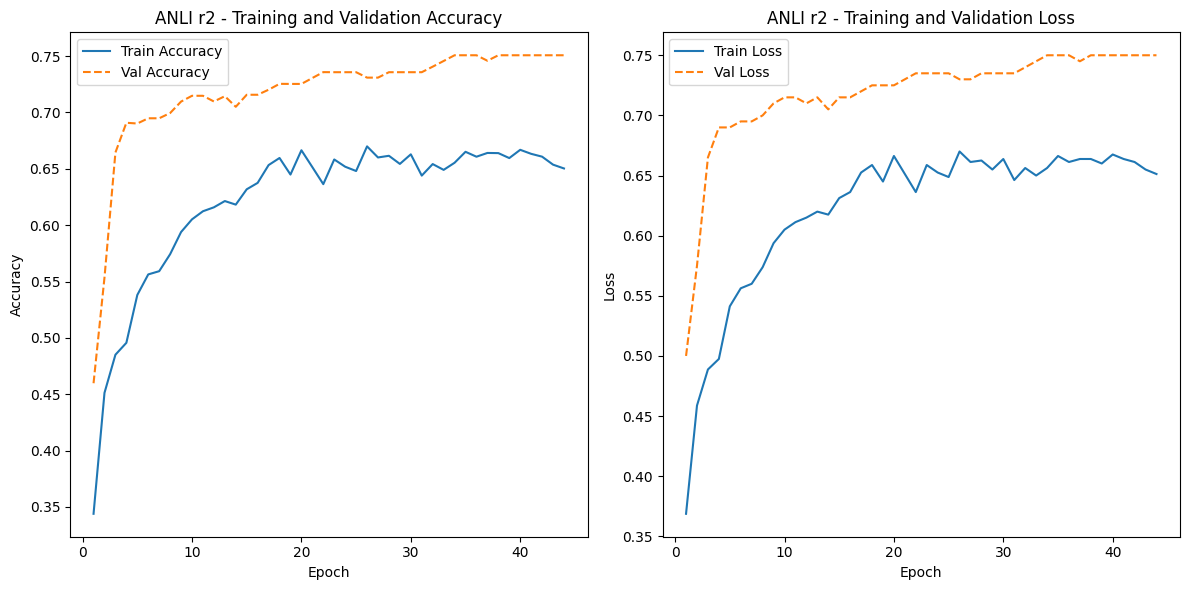

In [87]:
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Create graph data for ANLI r2
train_graph_anli_r2 = create_graph(X_train_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_test_anli_r2, y_test_anli_r2)

# Call the function to train and evaluate for ANLI r2
model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI r2'
)

Epoch 1/100, Train Loss: 1.1430, Val Loss: 1.1031, Val F1-score: 0.2266, Val Recall: 0.2292
Epoch 2/100, Train Loss: 1.1157, Val Loss: 1.0787, Val F1-score: 0.2851, Val Recall: 0.2958
Epoch 3/100, Train Loss: 1.0897, Val Loss: 1.0557, Val F1-score: 0.5896, Val Recall: 0.6000
Epoch 4/100, Train Loss: 1.0758, Val Loss: 1.0339, Val F1-score: 0.6213, Val Recall: 0.6250
Epoch 5/100, Train Loss: 1.0563, Val Loss: 1.0131, Val F1-score: 0.6417, Val Recall: 0.6417
Epoch 6/100, Train Loss: 1.0320, Val Loss: 0.9934, Val F1-score: 0.6594, Val Recall: 0.6583
Epoch 7/100, Train Loss: 1.0166, Val Loss: 0.9748, Val F1-score: 0.6645, Val Recall: 0.6625
Epoch 8/100, Train Loss: 1.0051, Val Loss: 0.9573, Val F1-score: 0.6686, Val Recall: 0.6667
Epoch 9/100, Train Loss: 0.9999, Val Loss: 0.9407, Val F1-score: 0.6729, Val Recall: 0.6708
Epoch 10/100, Train Loss: 0.9741, Val Loss: 0.9249, Val F1-score: 0.6855, Val Recall: 0.6833
Epoch 11/100, Train Loss: 0.9661, Val Loss: 0.9098, Val F1-score: 0.6855, Val R

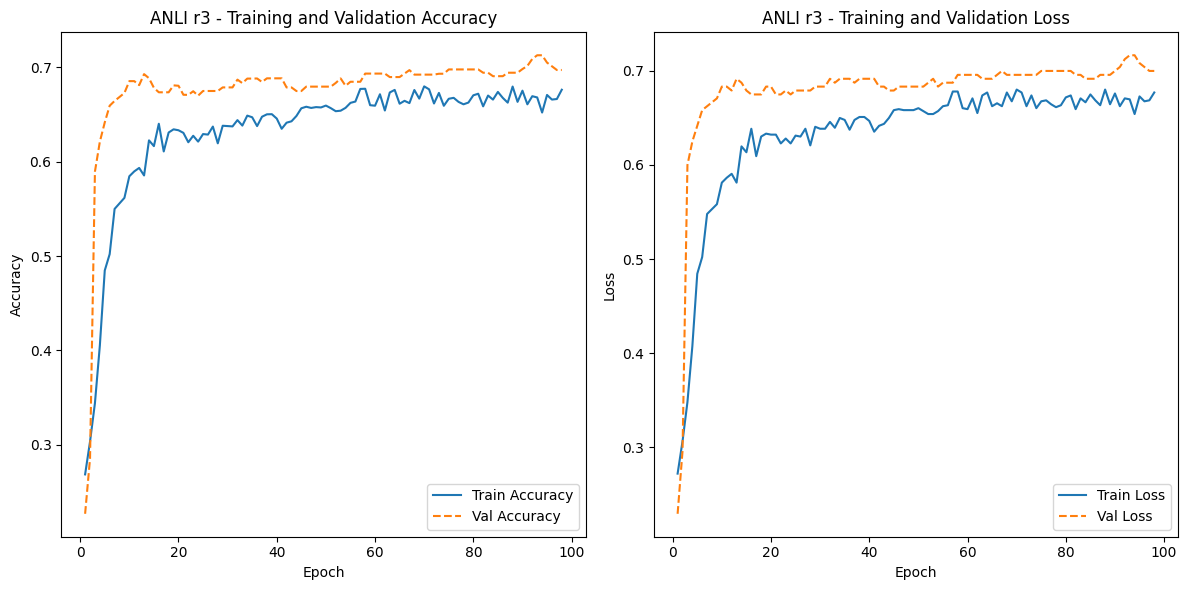

In [88]:
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Create graph data for ANLI r3
train_graph_anli_r3 = create_graph(X_train_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_test_anli_r3, y_test_anli_r3)

# Call the function to train and evaluate for ANLI r3
model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI r3'
)

/tmp/ipykernel_34/3613549310.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 1/100, Train Loss: 0.9982, Val Loss: 0.9367, Val F1-score: 0.8817, Val Recall: 0.8809
Epoch 2/100, Train Loss: 0.9541, Val Loss: 0.8920, Val F1-score: 0.8898, Val Recall: 0.8891
Epoch 3/100, Train Loss: 0.9117, Val Loss: 0.8489, Val F1-score: 0.8942, Val Recall: 0.8935
Epoch 4/100, Train Loss: 0.8683, Val Loss: 0.8076, Val F1-score: 0.8979, Val Recall: 0.8972
Epoch 5/100, Train Loss: 0.8294, Val Loss: 0.7681, Val F1-score: 0.8992, Val Recall: 0.8985
Epoch 6/100, Train Loss: 0.7903, Val Loss: 0.7304, Val F1-score: 0.8990, Val Recall: 0.8984
Epoch 7/100, Train Loss: 0.7540, Val Loss: 0.6945, Val F1-score: 0.8997, Val Recall: 0.8992
Epoch 8/100, Train Loss: 0.7208, Val Loss: 0.6607, Val F1-score: 0.9003, Val Recall: 0.8998
Epoch 9/100, Train Loss: 0.6870, Val Loss: 0.6289, Val F1-score: 0.9004, Val Recall: 0.8999
Epoch 10/100, Train Loss: 0.6584, Val Loss: 0.5993, Val F1-score: 0.8996, Val Recall: 0.8992
Epoch 11/100, Train Loss: 0.6285, Val Loss: 0.5712, Val F1-score: 0.9003, Val R

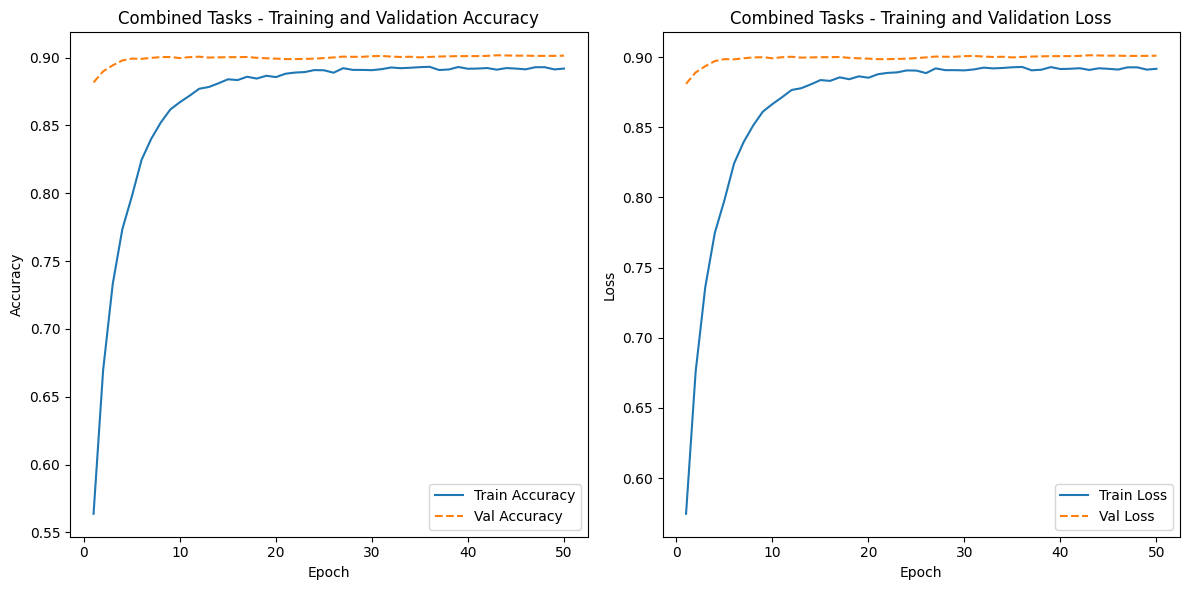

In [89]:
import torch

# Convert NumPy arrays to PyTorch tensors
X_train_snli_tensor = torch.tensor(X_train_snli)
X_train_mnli_matched_tensor = torch.tensor(X_train_mnli_matched)
X_train_mnli_mismatched_tensor = torch.tensor(X_train_mnli_mismatched)
X_train_anli_r1_tensor = torch.tensor(X_train_anli_r1)
X_train_anli_r2_tensor = torch.tensor(X_train_anli_r2)
X_train_anli_r3_tensor = torch.tensor(X_train_anli_r3)

y_train_snli_tensor = torch.tensor(y_train_snli)
y_train_mnli_matched_tensor = torch.tensor(y_train_mnli_matched)
y_train_mnli_mismatched_tensor = torch.tensor(y_train_mnli_mismatched)
y_train_anli_r1_tensor = torch.tensor(y_train_anli_r1)
y_train_anli_r2_tensor = torch.tensor(y_train_anli_r2)
y_train_anli_r3_tensor = torch.tensor(y_train_anli_r3)

# Concatenate X_train and y_train for all tasks
X_train_all = torch.cat([X_train_snli_tensor, X_train_mnli_matched_tensor, X_train_mnli_mismatched_tensor, X_train_anli_r1_tensor, X_train_anli_r2_tensor, X_train_anli_r3_tensor], dim=0)
y_train_all = torch.cat([y_train_snli_tensor, y_train_mnli_matched_tensor, y_train_mnli_mismatched_tensor, y_train_anli_r1_tensor, y_train_anli_r2_tensor, y_train_anli_r3_tensor], dim=0)

# Convert NumPy arrays to PyTorch tensors for test data
X_test_snli_tensor = torch.tensor(X_test_snli)
X_test_mnli_matched_tensor = torch.tensor(X_test_mnli_matched)
X_test_mnli_mismatched_tensor = torch.tensor(X_test_mnli_mismatched)
X_test_anli_r1_tensor = torch.tensor(X_test_anli_r1)
X_test_anli_r2_tensor = torch.tensor(X_test_anli_r2)
X_test_anli_r3_tensor = torch.tensor(X_test_anli_r3)

y_test_snli_tensor = torch.tensor(y_test_snli)
y_test_mnli_matched_tensor = torch.tensor(y_test_mnli_matched)
y_test_mnli_mismatched_tensor = torch.tensor(y_test_mnli_mismatched)
y_test_anli_r1_tensor = torch.tensor(y_test_anli_r1)
y_test_anli_r2_tensor = torch.tensor(y_test_anli_r2)
y_test_anli_r3_tensor = torch.tensor(y_test_anli_r3)

# Concatenate X_test and y_test for all tasks
X_test_all = torch.cat([X_test_snli_tensor, X_test_mnli_matched_tensor, X_test_mnli_mismatched_tensor, X_test_anli_r1_tensor, X_test_anli_r2_tensor, X_test_anli_r3_tensor], dim=0)
y_test_all = torch.cat([y_test_snli_tensor, y_test_mnli_matched_tensor, y_test_mnli_mismatched_tensor, y_test_anli_r1_tensor, y_test_anli_r2_tensor, y_test_anli_r3_tensor], dim=0)

# Create graph data for ALL combined data
train_graph_all = create_graph(X_train_all, y_train_all)
test_graph_all = create_graph(X_test_all, y_test_all)

# Train and evaluate the model on the combined dataset
model_all, final_val_loss_all, final_val_accuracy_all = train_and_evaluate(
    train_graph_all, test_graph_all, 'Combined Tasks'
)
